## yolo5 사전학습된 모델로 바운딩 박스 추출

In [13]:
import torch
from pathlib import Path

# YOLOv5 모델 로드 (pre-trained weights)
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

# 이미지 입력 (파일 경로)
image_path = '키보드,마우스.jpg'

# 객체 감지 실행
results = model(image_path)

# 감지된 객체 정보 가져오기
detections = results.pandas().xyxy[0]  # DataFrame 형식 (xmin, ymin, xmax, ymax, confidence, class, name)

# TXT 파일로 저장
txt_path = Path(image_path).stem + ".txt"
with open(txt_path, "w") as f:
    for _, row in detections.iterrows():
        f.write(f"{row['name']} {row['xmin']} {row['ymin']} {row['xmax']} {row['ymax']} {row['confidence']}\n")

print(f"결과가 {txt_path}에 저장됨")


Using cache found in C:\ultralytics_yolov5_master
YOLOv5  2025-2-26 Python-3.8.20 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


결과가 키보드,마우스.txt에 저장됨


In [13]:
import torch
from pathlib import Path

# YOLOv5 모델 로드 (pre-trained weights)
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')

# 이미지 입력 (파일 경로)
image_path = '키보드,마우스.jpg'

# 객체 감지 실행
results = model(image_path)

# 감지된 객체 정보 가져오기
detections = results.pandas().xyxy[0]  # DataFrame 형식 (xmin, ymin, xmax, ymax, confidence, class, name)

# TXT 파일로 저장
txt_path = Path(image_path).stem + ".txt"
with open(txt_path, "w") as f:
    for _, row in detections.iterrows():
        f.write(f"{row['name']} {row['xmin']} {row['ymin']} {row['xmax']} {row['ymax']} {row['confidence']}\n")

print(f"결과가 {txt_path}에 저장됨")


Using cache found in C:\Users\ailab/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-2-26 Python-3.8.20 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


결과가 키보드,마우스.txt에 저장됨


## 바운딩 박스 출력

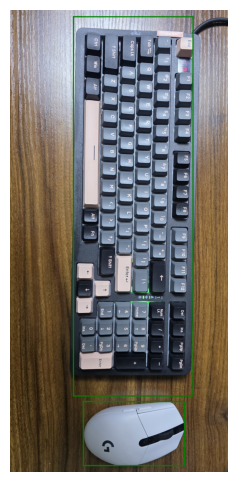

In [17]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 이미지 경로와 TXT 파일 경로 입력 받기

image_path = '키보드,마우스.jpg'  # 원본 이미지
txt_path = '키보드,마우스.txt'  # 저장된 바운딩 박스 정보

# 이미지 불러오기
image = Image.open(image_path)
image = image.convert("RGB")  # RGB로 변환

# TXT 파일에서 바운딩 박스 정보 읽기
with open(txt_path, 'r') as f:
    lines = f.readlines()

# 바운딩 박스 그리기
draw = ImageDraw.Draw(image)
for line in lines:
    parts = line.strip().split()
    label = parts[0]  # 객체 이름
    xmin, ymin, xmax, ymax, confidence = map(float, parts[1:])  # 좌표 및 신뢰도

    # 좌표 정수 변환
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)

    # 바운딩 박스 그리기
    draw.rectangle([xmin, ymin, xmax, ymax], outline="green", width=10)
    draw.text((xmin, ymin - 5), f"{label} {confidence:.2f}", fill="green")

# 결과 이미지 출력
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.show()


## 만얀 사전학습된 모델이지만 되지 않을 경우 메타데이터 확인

In [6]:
from PIL import Image

# 이미지 불러오기
image_path = '키보드,마우스.jpg'
image = Image.open(image_path)

# EXIF 데이터 추출
exif_data = image._getexif()

# EXIF 데이터가 있으면 출력
if exif_data:
    for tag, value in exif_data.items():
        print(f"Tag: {tag}, Value: {value}")
else:
    print("이 이미지에는 EXIF 메타데이터가 없습니다.")


이 이미지에는 EXIF 메타데이터가 없습니다.


## 회전된 이미지 정방향으로 돌리는 코드

In [ ]:
from PIL import Image, ExifTags
import piexif

# 이미지 경로
image_path = '키보드,마우스.jpg'

# 이미지 열기
image = Image.open(image_path)

# EXIF 데이터 추출
exif_data = image._getexif()

# EXIF 데이터가 있는지 확인
if exif_data:
    # Orientation (274) 태그 찾기
    orientation_tag = 274
    orientation_value = exif_data.get(orientation_tag)

    if orientation_value == 6:
        print("이미지가 90도 회전된 상태입니다. 회전값을 1로 변경합니다.")

        # 이미지를 90도 반시계방향으로 회전하여 수정
        image = image.rotate(-90, expand=True)

        # EXIF 수정: Orientation을 1로 변경 (정상 방향)
        exif_data[orientation_tag] = 1

        # 수정된 EXIF 데이터를 이미지에 적용
        exif_bytes = piexif.dump(exif_data)

        # 새로운 EXIF 데이터가 적용된 이미지를 저장
        image.save('키보드,마우스_modified.jpg', exif=exif_bytes)
        print("수정된 이미지를 저장했습니다.")
    else:
        print(f"Orientation 값은 {orientation_value}입니다. 회전이 필요하지 않습니다.")
else:
    print("이 이미지에는 EXIF 메타데이터가 없습니다.")
